## Preparing and visualizing data for feature extraction

vehicles 8792
non-vehicles 9040


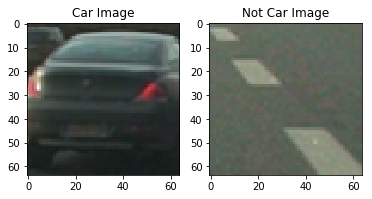

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.ndimage.measurements import label
from sklearn import svm
from sklearn.svm import SVR
import pickle
%matplotlib inline
# Read in our vehicles
l1 = glob.glob('vehicles/**/*.png',recursive=True)
l2 = glob.glob('non-vehicles/**/*.png',recursive=True)  
car_images=[]
no_car_images=[]
for image in l1:
    car_images.append(image)
for image in l2:
    no_car_images.append(image)

print('vehicles',len(car_images))
print('non-vehicles',len(no_car_images))
# Define a function to return HOG features and visualization
# Features will always be the first element of the return
# Image data will be returned as the second element if visualize= True
# Otherwise there is no second return element

# Generate a random index to look at a car image
indx_car = np.random.randint(0, len(car_images))
indx_no_car = np.random.randint(0, len(no_car_images))
# Read in the image
image_car = mpimg.imread(car_images[indx_car])
image_not_car = mpimg.imread(no_car_images[indx_no_car])

# Plot the examples
fig = plt.figure(0)
plt.subplot(121)
plt.imshow(image_car, cmap='gray')
plt.title('Car Image')
plt.subplot(122)
plt.imshow(image_not_car, cmap='gray')
plt.title('Not Car Image')
plt.show()


## Extracting and visualizing features

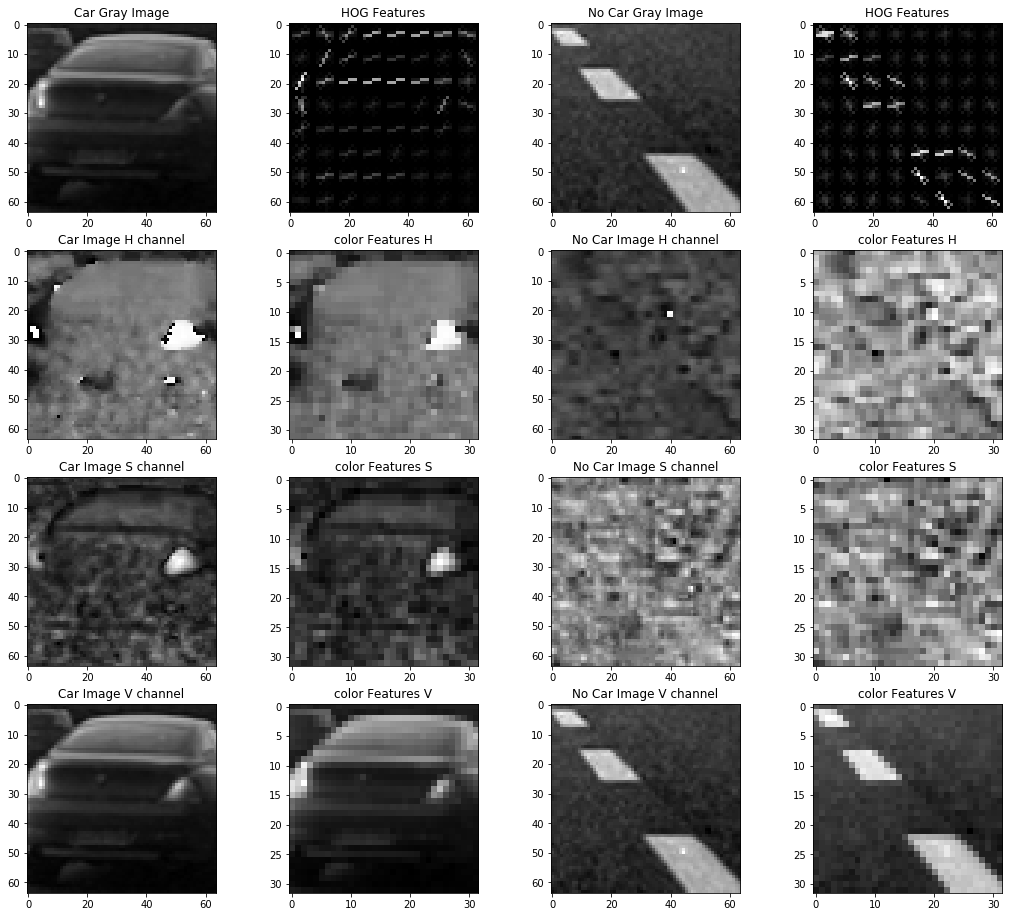

In [2]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features  
def bin_spatial_feat(img,size):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features
    
# spatial bin _color_features
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    # Use cv2.resize().ravel() to create the feature vector
    newimg = np.array(img)
    if color_space != 'RGB':
        if color_space == 'HSV':
            newimg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            newimg = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            newimg = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            newimg = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            newimg = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    features_img = cv2.resize(newimg,size)
    features = features_img.ravel() # Remove this line!
    # Return the feature vector
    return features,features_img,newimg


gray_car = cv2.cvtColor(image_car, cv2.COLOR_RGB2GRAY)
# Call our function with vis=True to see an image output
hog_features_car, hog_image_car = get_hog_features(gray_car, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=False)

gray_no_car = cv2.cvtColor(image_not_car, cv2.COLOR_RGB2GRAY)
hog_features_no_car, hog_image_no_car = get_hog_features(gray_no_car, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=False)
hog_features_car= get_hog_features(gray_car, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=False, feature_vec=False)

#color_features
features,image_col_car,orig_car = bin_spatial(image_car,"HSV")
features,image_col_no_car,orig_no_car = bin_spatial(image_not_car,"HSV")

fig = plt.figure(0,figsize=(18, 16))
plt.subplot(4,4,1)
plt.imshow(gray_car, cmap='gray')
plt.title('Car Gray Image')
plt.subplot(4,4,2)
plt.imshow(hog_image_car, cmap='gray')
plt.title('HOG Features')

plt.subplot(4,4,3)
plt.imshow(gray_no_car, cmap='gray')
plt.title('No Car Gray Image')
plt.subplot(4,4,4)
plt.imshow(hog_image_no_car, cmap='gray')
plt.title('HOG Features')

plt.subplot(4,4,5)
plt.imshow(np.squeeze(orig_car[:,:,0]), cmap='gray')
plt.title('Car Image H channel')
plt.subplot(4,4,6)
plt.imshow(np.squeeze(image_col_car[:,:,0]), cmap='gray')
plt.title('color Features H')

plt.subplot(4,4,7)
plt.imshow(np.squeeze(orig_no_car[:,:,0]), cmap='gray')
plt.title('No Car Image H channel')
plt.subplot(4,4,8)
plt.imshow(np.squeeze(image_col_no_car[:,:,0]), cmap='gray')
plt.title('color Features H')

plt.subplot(4,4,9)
plt.imshow(np.squeeze(orig_car[:,:,1]), cmap='gray')
plt.title('Car Image S channel')
plt.subplot(4,4,10)
plt.imshow(np.squeeze(image_col_car[:,:,1]), cmap='gray')
plt.title('color Features S')

plt.subplot(4,4,11)
plt.imshow(np.squeeze(orig_no_car[:,:,1]), cmap='gray')
plt.title('No Car Image S channel')
plt.subplot(4,4,12)
plt.imshow(np.squeeze(image_col_no_car[:,:,1]), cmap='gray')
plt.title('color Features S')


plt.subplot(4,4,13)
plt.imshow(np.squeeze(orig_car[:,:,2]), cmap='gray')
plt.title('Car Image V channel')
plt.subplot(4,4,14)
plt.imshow(np.squeeze(image_col_car[:,:,2]), cmap='gray')
plt.title('color Features V')

plt.subplot(4,4,15)
plt.imshow(np.squeeze(orig_no_car[:,:,2]), cmap='gray')
plt.title('No Car Image V channel')
plt.subplot(4,4,16)
plt.imshow(np.squeeze(image_col_no_car[:,:,2]), cmap='gray')
plt.title('color Features V')

plt.show()


## Train/Load classifier

In [3]:
from Classifier_train import classifier,get_model_for_classifier
#svc,classiFier,X_scaler = get_model_for_classifier('vehicles/**/*.png','non-vehicles/**/*.png')

svc,classiFier,X_scaler = get_model_for_classifier('vehicles/**/*.png','non-vehicles/**/*.png','model01.pkl',False)

In [4]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2HSV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    return img

# Define a function to compute color histogram features  
def color_hist(img, num_histbin,bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=num_histbin, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=num_histbin, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=num_histbin, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

    
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, xstart, xstop,scalex,scaley,svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size,
              hist_bins,bbox_list,showall=False):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,xstart:xstop,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2HSV')
    if scalex != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scalex), np.int(imshape[0]/scaley)),)
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 1

    
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)

    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg =  ctrans_tosearch[ytop:ytop+window, xleft:xleft+window];
            if(subimg.shape[0] != 64 and subimg.shape[1] != 64):
                subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
            # Get color features
            spatial_features = bin_spatial_feat(subimg, size=spatial_size)
            hist_features = color_hist(subimg, num_histbin=hist_bins)
            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))   
            test_prediction = svc.predict(test_features)

            if test_prediction == 1 or showall:
                xbox_left = np.int(xleft*scalex)
                ytop_draw = np.int(ytop*scaley)
                win_drawx = np.int(window*scalex)
                win_drawy = np.int(window*scaley)
                cv2.rectangle(draw_img,(xbox_left+xstart, ytop_draw+ystart),(xbox_left+xstart+win_drawx,ytop_draw+win_drawy+ystart),(0,0,255),6) 
                bbox_list.append(((xbox_left+xstart, ytop_draw+ystart),(xbox_left+xstart+win_drawx,ytop_draw+win_drawy+ystart)))
    return bbox_list

def get_bbox(img,showallWin=False):
    orient = classiFier.num_orient
    pix_per_cell = classiFier.pix_per_cell
    cell_per_block = classiFier.cell_per_block
    hog_channel = classiFier.hog_channels # Can be 0, 1, 2, or "ALL"
    spatial = classiFier.spatial_size
    histbin = classiFier.num_histbin

    bbox_list = []
    scalesx = np.array([1,1.5,2,2.5])
    scalesy = np.array([1,1.25,1.75,2])
    for scalex,scaley in zip(scalesx,scalesy):
        xstart =400 
        xstop = img.shape[1]
        if(scalex == 1):
            ystart = 400
            ystop = 600
        elif(scalex==2.5):
            xstart = 700
            xstop = 1280
            ystart = 400
            ystop = 700
        else:
            xstart = 500
            xstop = 1280
            ystart = 400
            ystop = 700
        bbox_list = find_cars(img, ystart, ystop,xstart,xstop, scalex, scaley,svc, X_scaler, orient,
                              pix_per_cell, cell_per_block, (spatial, spatial),
                              histbin,bbox_list,showallWin)
  
    return bbox_list


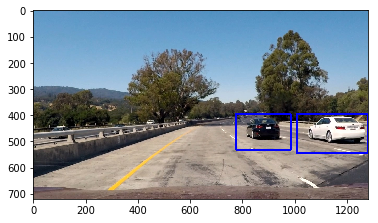

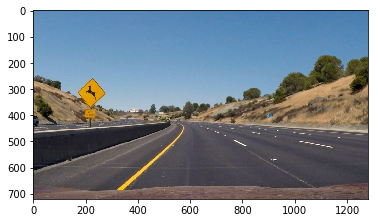

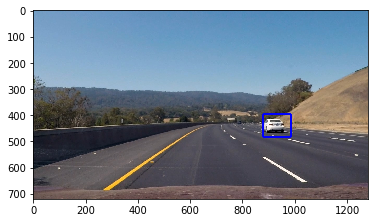

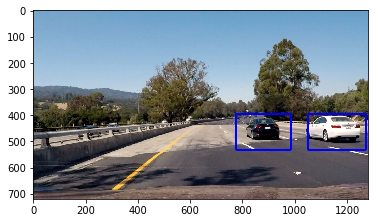

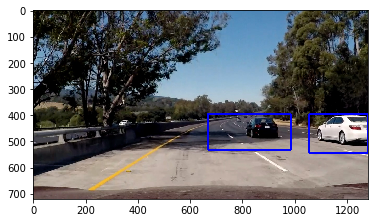

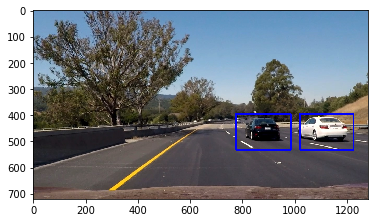

In [5]:

from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]-5:box[1][1]+5, box[0][0]-5:box[1][0]+5] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image if its big enough to be a car
        if(abs(bbox[1][1] - bbox[0][1])>63 and abs(bbox[1][0] - bbox[0][0])>63):
            cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

def get_heatmap(image):
    box_list = get_bbox(image,False)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    heat = apply_threshold(heat,0)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    img2 = np.array(image)
    for bbox in box_list:
        cv2.rectangle(img2, bbox[0], bbox[1], (0,0,255), 6)

    return draw_img,img2


def get_heatmap_pipe(image):
    global heat_map
    global cnt
    if(cnt%3==0):
        box_list = get_bbox(image)
        heat = np.zeros_like(image[:,:,0]).astype(np.float)

        # Add heat to each box in box list
        heat = add_heat(heat,box_list)
        #heat = apply_threshold(heat,0)

        heat_map.append(heat)
        if(len(heat_map)>3):
            heat_map = heat_map[1:]

    #updating cnt
    cnt = cnt + 1
    
    heat_bind = np.sum(np.array(heat_map),axis=0)
    # Apply threshold to help remove false positives
    heat_bind = apply_threshold(heat_bind,3)
    
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat_bind, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
       
    return draw_img

for i in range(6):
    heat_map = []
    p = mpimg.imread("test_images/test"+str(i+1)+".jpg")

    out_img,out2 = get_heatmap(p)
    fig = plt.figure(i)
    plt.imshow(out_img)
    plt.show
    #fig = plt.figure(i+10)
    #plt.imshow(out2)
    #plt.show()


In [6]:
# Import everything needed to edit/save/watch video clips
import os
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [7]:
if not os.path.exists('test_videos_output'):
    os.mkdir('test_videos_output')
white_output = 'test_videos_output/video1.mp4'
heat_map = []
cnt = 0
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_video.mp4")
white_clip = clip1.fl_image(get_heatmap_pipe) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/video1.mp4
[MoviePy] Writing video test_videos_output/video1.mp4


 97%|█████████▋| 38/39 [01:11<00:01,  1.89s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/video1.mp4 

CPU times: user 1min 11s, sys: 232 ms, total: 1min 11s
Wall time: 1min 12s


In [8]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [9]:
if not os.path.exists('test_videos_output'):
    os.mkdir('test_videos_output')
white_output1 = 'test_videos_output/video2.mp4'
heat_map = []
cnt = 0
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip1 = VideoFileClip("project_video.mp4").subclip(15,25)
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(get_heatmap_pipe) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output1, audio=False)

[MoviePy] >>>> Building video test_videos_output/video2.mp4
[MoviePy] Writing video test_videos_output/video2.mp4


100%|█████████▉| 1260/1261 [38:06<00:01,  1.79s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/video2.mp4 

CPU times: user 38min 7s, sys: 3.52 s, total: 38min 11s
Wall time: 38min 7s


In [10]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output1))